In [1]:
import numpy as np

docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [5]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<nothing>')


# convet the sentance into word by word, capital to small,remove the specil character or symbol
# also genrate index numbers
# oov_token - if in future we get a word whihc is not present in the training set,then we will replace those new word with the woed given inside this

In [6]:
tokenizer.fit_on_texts(docs)

In [7]:
tokenizer.word_index

# uniqe words iwth its index

{'<nothing>': 1,
 'india': 2,
 'jeetega': 3,
 'hip': 4,
 'ki': 5,
 'jai': 6,
 'kohli': 7,
 'sachin': 8,
 'dhoni': 9,
 'go': 10,
 'hurray': 11,
 'bhai': 12,
 'bharat': 13,
 'mata': 14,
 'modi': 15,
 'ji': 16,
 'inquilab': 17,
 'zindabad': 18}

In [8]:
tokenizer.word_counts

# each word count

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('modi', 1),
             ('ji', 1),
             ('inquilab', 1),
             ('zindabad', 1)])

In [9]:
tokenizer.document_count

# sentance count in document

10

In [10]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

# it generate sequence for every sentance
# [[10, 2], - here 'go' index was 10 and 'india' index was 2

[[10, 2],
 [2, 2],
 [4, 4, 11],
 [3, 12, 3, 2, 3],
 [13, 14, 5, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [15, 16, 5, 6],
 [17, 18]]

In [11]:
from keras.utils import pad_sequences

# applying padding because the size of sequen is diff for evry sentance

In [12]:
sequences = pad_sequences(sequences,padding='post')
sequences

# here we passed sequences inside pad_seq and kept padding = post ,means 0 will be added in the end



array([[10,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4, 11,  0,  0],
       [ 3, 12,  3,  2,  3],
       [13, 14,  5,  6,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [ 9,  9,  0,  0,  0],
       [15, 16,  5,  6,  0],
       [17, 18,  0,  0,  0]])

Till now we just converted the text into vector

In [13]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [14]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

# imdb dataset has imdb reviews and thre sentiments

17464789/17464789 [==============================] - 8s 0us/step


here this dataset is already tokanized and integer encoded also

In [19]:
X_train.shape

# no.of review in traing data

(25000,)

In [20]:
X_test.shape

(25000,)

In [22]:
X_train

# here the data is alrady preprocced and integer encoded so there is not sentenc or words below

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [23]:
X_train[0]

# the out we got as a integer because of integer encoding

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [27]:
# len(X_train[0]) - 218
# len(X_train[1]) - 189
len(X_train[2])

141

In [28]:
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)

# now the length of the every sentence is diff so we r triming the data set
# maxlen=50 - means take only first 50 words of each review and remove rest, becausd data is big and it will take time to train

In [31]:
X_train.shape

# 25000 sent and 50 words in each sent

(25000, 50)

In [29]:
X_train[0]

array([2071,   56,   26,  141,    6,  194, 7486,   18,    4,  226,   22,
         21,  134,  476,   26,  480,    5,  144,   30, 5535,   18,   51,
         36,   28,  224,   92,   25,  104,    4,  226,   65,   16,   38,
       1334,   88,   12,   16,  283,    5,   16, 4472,  113,  103,   32,
         15,   16, 5345,   19,  178,   32])

In [33]:
model = Sequential()

model.add(SimpleRNN(32,input_shape=(50,1),return_sequences=False))
model.add(Dense(1,activation='sigmoid'))

# model.summary()


1. 32  nodes of simpleRNN layer       
2. input_shape(50,2), 50 is the timestep and 1 is the inpu feat      
3. 1 input node for i/p lay with 50 timestep,so one by one single i/p(the integer value) goes in RNN  
4. 32 nodes in the hidden layer(RNN lay)   
5. return_sequences=False - if it was true the Ot of each word will be printed and showed to us instead of staying inside the sys and only then we will get the o/p ad y^

for named entity recognition,we need to show,to see whether word is verb or not


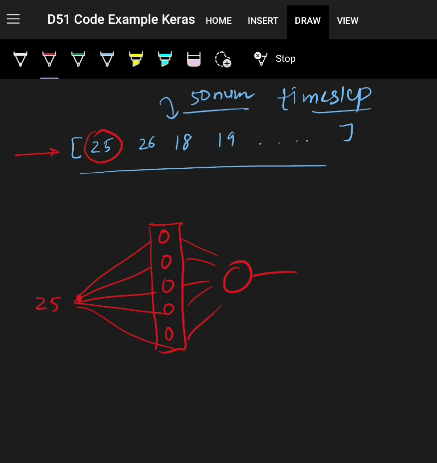

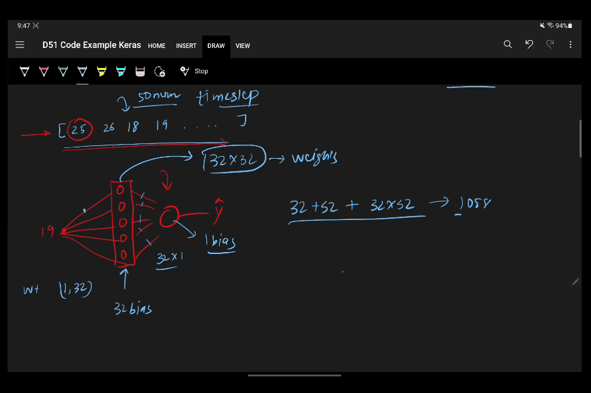

In [34]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


weight 32 + 1 bais = 33

In [35]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 [==============================] - 18s 20ms/step - loss: 0.6963 - accuracy: 0.5022 - val_loss: 0.6944 - val_accuracy: 0.5039
Epoch 2/5
782/782 [==============================] - 16s 20ms/step - loss: 0.6932 - accuracy: 0.5066 - val_loss: 0.6960 - val_accuracy: 0.5040
Epoch 3/5
782/782 [==============================] - 16s 20ms/step - loss: 0.6924 - accuracy: 0.5134 - val_loss: 0.6953 - val_accuracy: 0.5024
Epoch 4/5
782/782 [==============================] - 14s 18ms/step - loss: 0.6927 - accuracy: 0.5060 - val_loss: 0.6943 - val_accuracy: 0.5026
Epoch 5/5
782/782 [==============================] - 14s 18ms/step - loss: 0.6928 - accuracy: 0.5070 - val_loss: 0.6962 - val_accuracy: 0.5032
